In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [13]:
with open('../../output/weights/p_date=2022-09-21-17_04_53/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

31001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [14]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [15]:
def plot(data, title, labelX, labelY):
    interval = 1000
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    
    
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

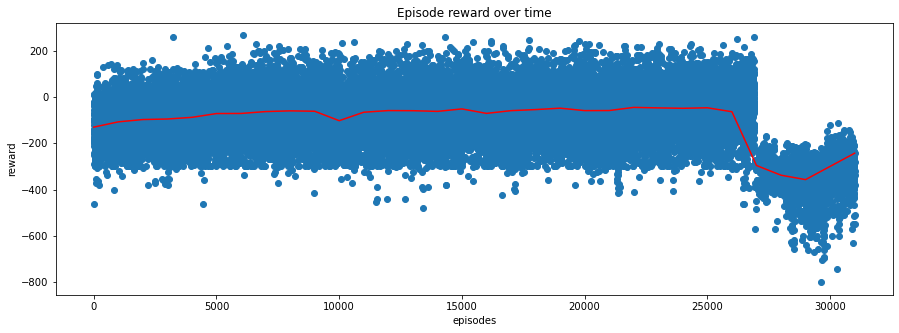

Maximum: 266.0999999999999
Average: -101.3464985000481
Moving Average (simple): {0: -130.4, 1000: -107.6, 2000: -97.6, 3000: -95.3, 4000: -88.1, 5000: -71.7, 6000: -71.3, 7000: -63.2, 8000: -60.1, 9000: -61.8, 10000: -102.5, 11000: -66.0, 12000: -58.8, 13000: -59.4, 14000: -62.4, 15000: -51.7, 16000: -71.0, 17000: -59.2, 18000: -54.6, 19000: -48.5, 20000: -59.0, 21000: -58.7, 22000: -45.1, 23000: -47.3, 24000: -49.0, 25000: -46.8, 26000: -63.9, 27000: -296.1, 28000: -338.1, 29000: -357.1, 30000: -300.0, 31000: -243.0}

Moving Average: []
Minimum: -801.4


In [16]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

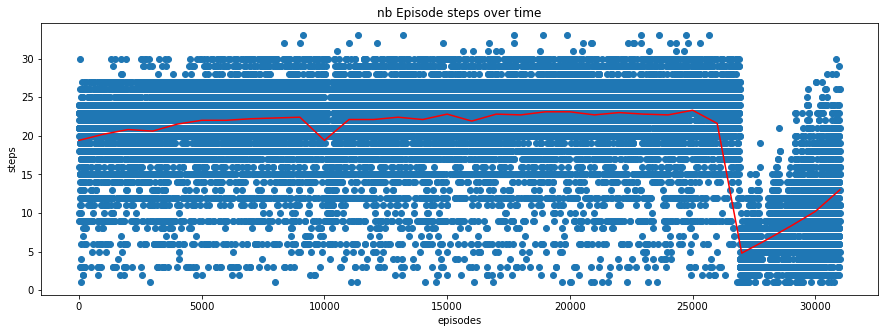

Maximum: 33
Average: 20.116512370568692
Moving Average (simple): {0: 19.4, 1000: 20.2, 2000: 20.8, 3000: 20.6, 4000: 21.5, 5000: 22.0, 6000: 22.0, 7000: 22.2, 8000: 22.3, 9000: 22.4, 10000: 19.4, 11000: 22.1, 12000: 22.1, 13000: 22.4, 14000: 22.1, 15000: 22.8, 16000: 21.9, 17000: 22.8, 18000: 22.7, 19000: 23.1, 20000: 23.1, 21000: 22.7, 22000: 23.0, 23000: 22.8, 24000: 22.7, 25000: 23.3, 26000: 21.6, 27000: 4.8, 28000: 6.5, 29000: 8.3, 30000: 10.2, 31000: 13}

Moving Average: ['+4% (20.2 | 4%)', '+2% (20.8 | 7%)', '0% (20.6 | 6%)', '+4% (21.5 | 10%)', '+2% (22.0 | 13%)', '0% (22.0 | 13%)', '+0% (22.2 | 14%)', '+0% (22.3 | 14%)', '+0% (22.4 | 15%)', '-13% (19.4 | 0%)', '+13% (22.1 | 13%)', '0% (22.1 | 13%)', '+1% (22.4 | 15%)', '-1% (22.1 | 13%)', '+3% (22.8 | 17%)', '-3% (21.9 | 12%)', '+4% (22.8 | 17%)', '0% (22.7 | 17%)', '+1% (23.1 | 19%)', '0% (23.1 | 19%)', '-1% (22.7 | 17%)', '+1% (23.0 | 18%)', '0% (22.8 | 17%)', '0% (22.7 | 17%)', '+2% (23.3 | 20%)', '-7% (21.6 | 11%)', '-77% (

In [17]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

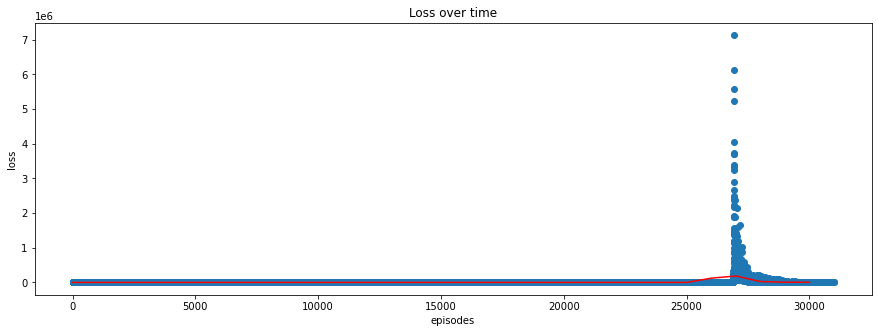

Maximum: 7127578.5
Average: 11450.58290084829
Moving Average (simple): {0: 233.2, 1000: 254.6, 2000: 249.8, 3000: 263.5, 4000: 273.5, 5000: 281.0, 6000: 294.0, 7000: 296.5, 8000: 297.0, 9000: 307.6, 10000: 356.7, 11000: 310.7, 12000: 317.8, 13000: 316.3, 14000: 319.3, 15000: 310.8, 16000: 335.9, 17000: 311.5, 18000: 313.5, 19000: 307.6, 20000: 401.7, 21000: 314.1, 22000: 303.1, 23000: 309.6, 24000: 310.8, 25000: 318.0, 26000: 123634.0, 27000: 185658.3, 28000: 26770.2, 29000: 6613.2, 30000: 4437.7}

Moving Average: ['+9% (254.6 | 9%)', '-1% (249.8 | 7%)', '+5% (263.5 | 12%)', '+3% (273.5 | 17%)', '+2% (281.0 | 20%)', '+4% (294.0 | 26%)', '+0% (296.5 | 27%)', '+0% (297.0 | 27%)', '+3% (307.6 | 31%)', '+15% (356.7 | 52%)', '-12% (310.7 | 33%)', '+2% (317.8 | 36%)', '0% (316.3 | 35%)', '+0% (319.3 | 36%)', '-2% (310.8 | 33%)', '+8% (335.9 | 44%)', '-7% (311.5 | 33%)', '+0% (313.5 | 34%)', '-1% (307.6 | 31%)', '+30% (401.7 | 72%)', '-21% (314.1 | 34%)', '-3% (303.1 | 29%)', '+2% (309.6 | 32

In [18]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")